In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import ipywidgets as widgets
from ipywidgets import interactive

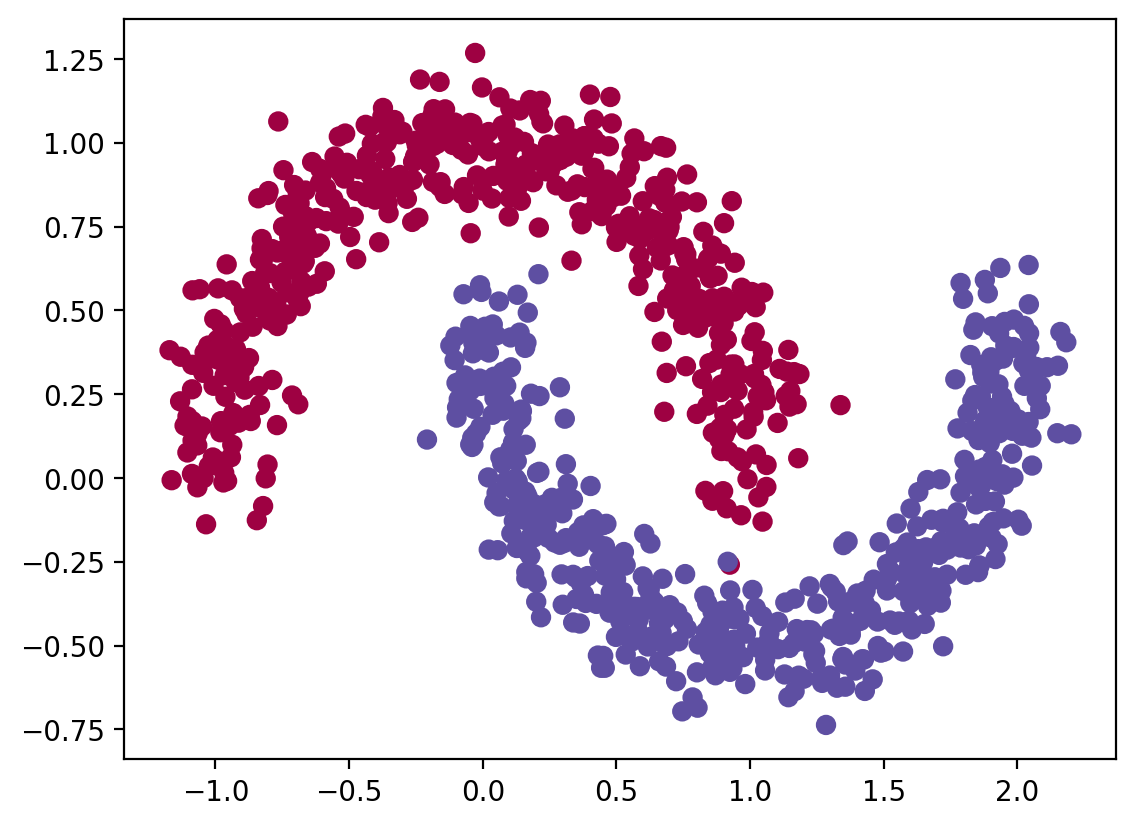

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral);

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)

rf.fit(X, y)

RandomForestClassifier(random_state=0)

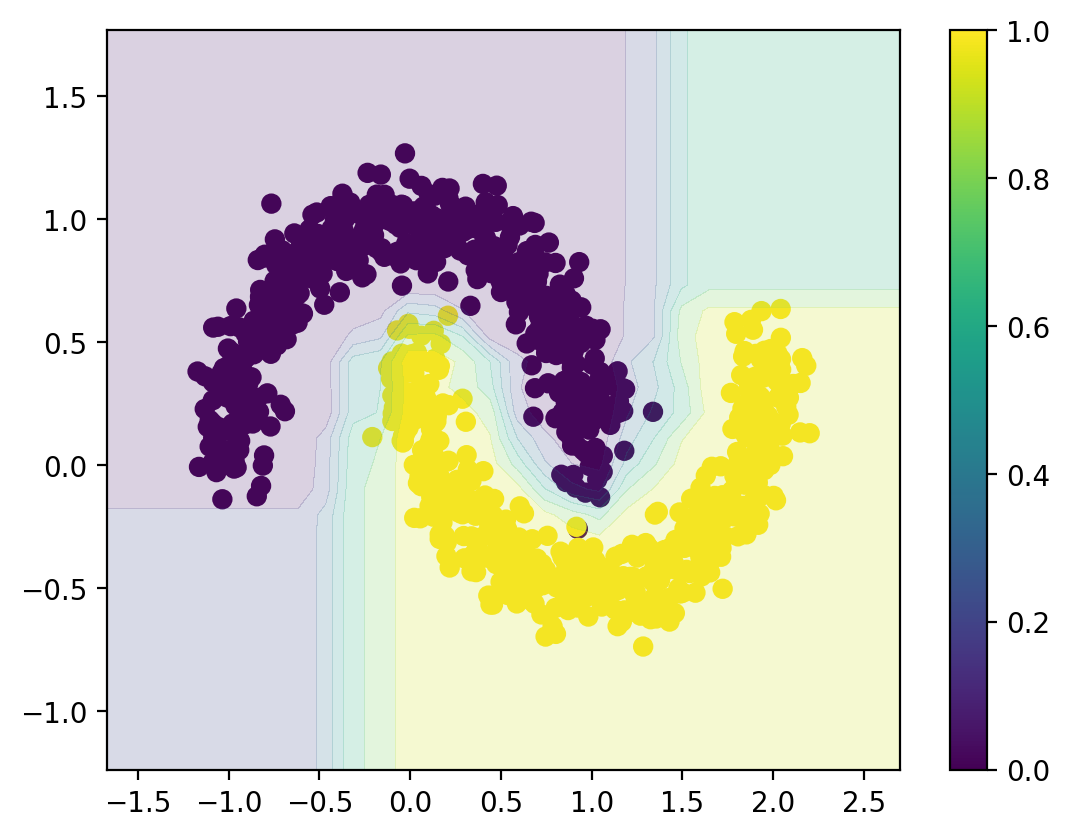

In [5]:
# Decision surface
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.viridis)
ax = plt.gca()
xlim = X[:, 0].min()-0.5, X[:, 0].max() + 0.5
ylim = X[:, 1].min()-0.5, X[:, 1].max() + 0.5

# Create grid to evaluate model
x_lin = np.linspace(xlim[0], xlim[1], 30)
y_lin = np.linspace(ylim[0], ylim[1], 30)

XX, YY = np.meshgrid(x_lin, y_lin)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = rf.predict_proba(xy)[:, 1].reshape(XX.shape)

# Plot decision boundary
ax.contourf(XX, YY, Z, cmap=plt.cm.viridis, alpha=0.2);

plt.colorbar();


In [6]:
X_arr = np.array([1, 2, 3, 4])
Y_arr = np.array([5, 6, 7])

XX, YY = np.meshgrid(X_arr, Y_arr)

In [9]:
XX

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [10]:
YY

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7]])

In [11]:
XX.shape, YY.shape

((3, 4), (3, 4))

In [12]:
out = {}
count = 0
for i in range(XX.shape[0]):
    for j in range(XX.shape[1]):
        count = count + 1
        out[count] = {"i": i, "j": j, "XX": XX[i, j], "YY": YY[i, j]}

In [13]:
pd.DataFrame(out).T

,i,j,XX,YY
1,0,0,1,5
2,0,1,2,5
3,0,2,3,5
4,0,3,4,5
5,1,0,1,6
6,1,1,2,6
7,1,2,3,6
8,1,3,4,6
9,2,0,1,7
10,2,1,2,7


In [144]:
XX[0], YY[0]

(array([1, 2, 3, 4]), array([5, 5, 5, 5]))

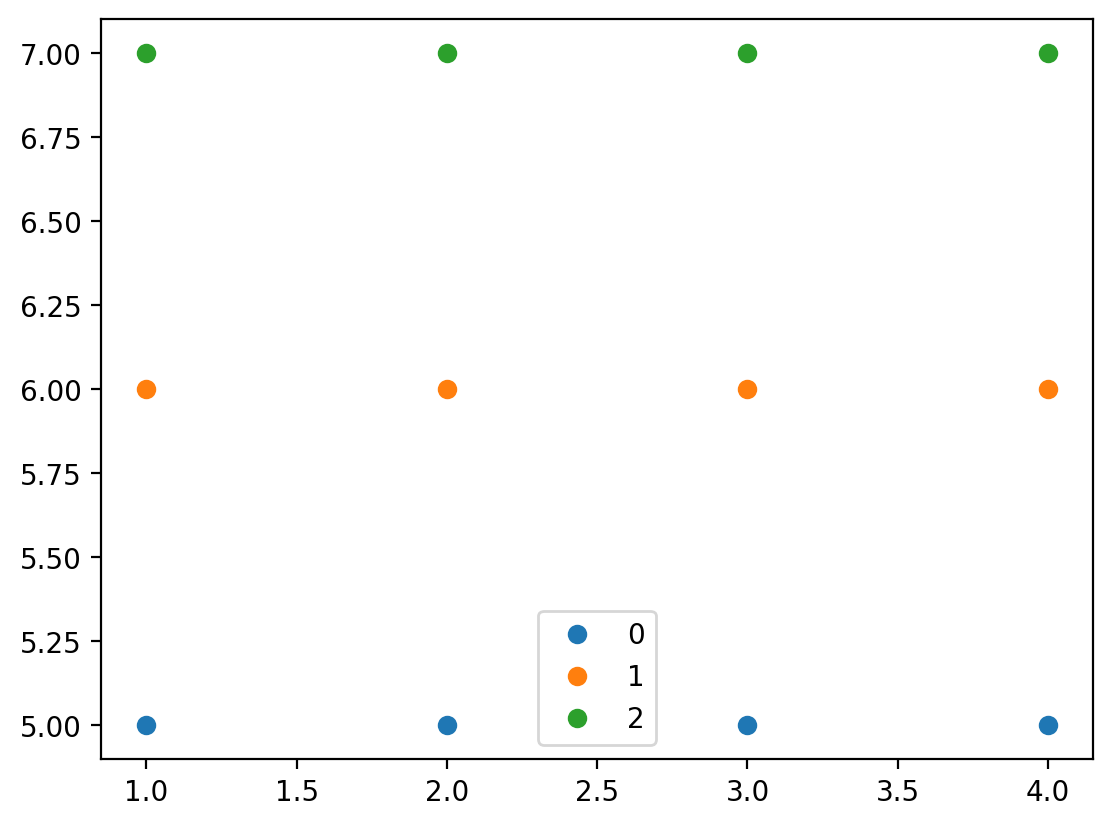

In [145]:
for i in range(XX.shape[0]):
    plt.plot(XX[i], YY[i], 'o', label=i)
plt.legend();

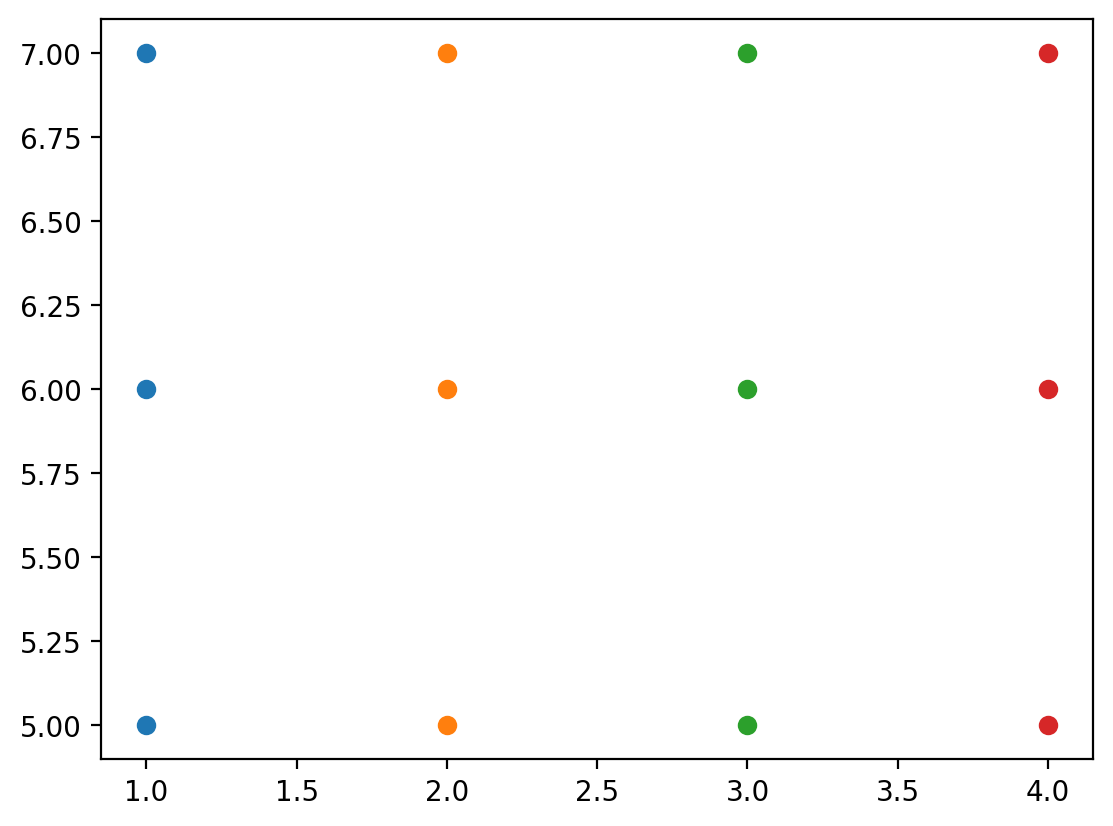

In [146]:
plt.plot(XX, YY, 'o');

In [15]:
xlim = X[:, 0].min()-0.5, X[:, 0].max() + 0.5
ylim = X[:, 1].min()-0.5, X[:, 1].max() + 0.5

# Create grid to evaluate model
x_lin = np.linspace(xlim[0], xlim[1], 30)
y_lin = np.linspace(ylim[0], ylim[1], 30)

In [16]:
x_lin

array([-1.67150293, -1.52070662, -1.36991031, -1.219114  , -1.06831769,
       -0.91752137, -0.76672506, -0.61592875, -0.46513244, -0.31433613,
       -0.16353982, -0.01274351,  0.1380528 ,  0.28884911,  0.43964542,
        0.59044173,  0.74123804,  0.89203435,  1.04283066,  1.19362697,
        1.34442328,  1.49521959,  1.6460159 ,  1.79681221,  1.94760852,
        2.09840483,  2.24920114,  2.39999745,  2.55079376,  2.70159007])

In [17]:
XX, YY = np.meshgrid(x_lin, y_lin)


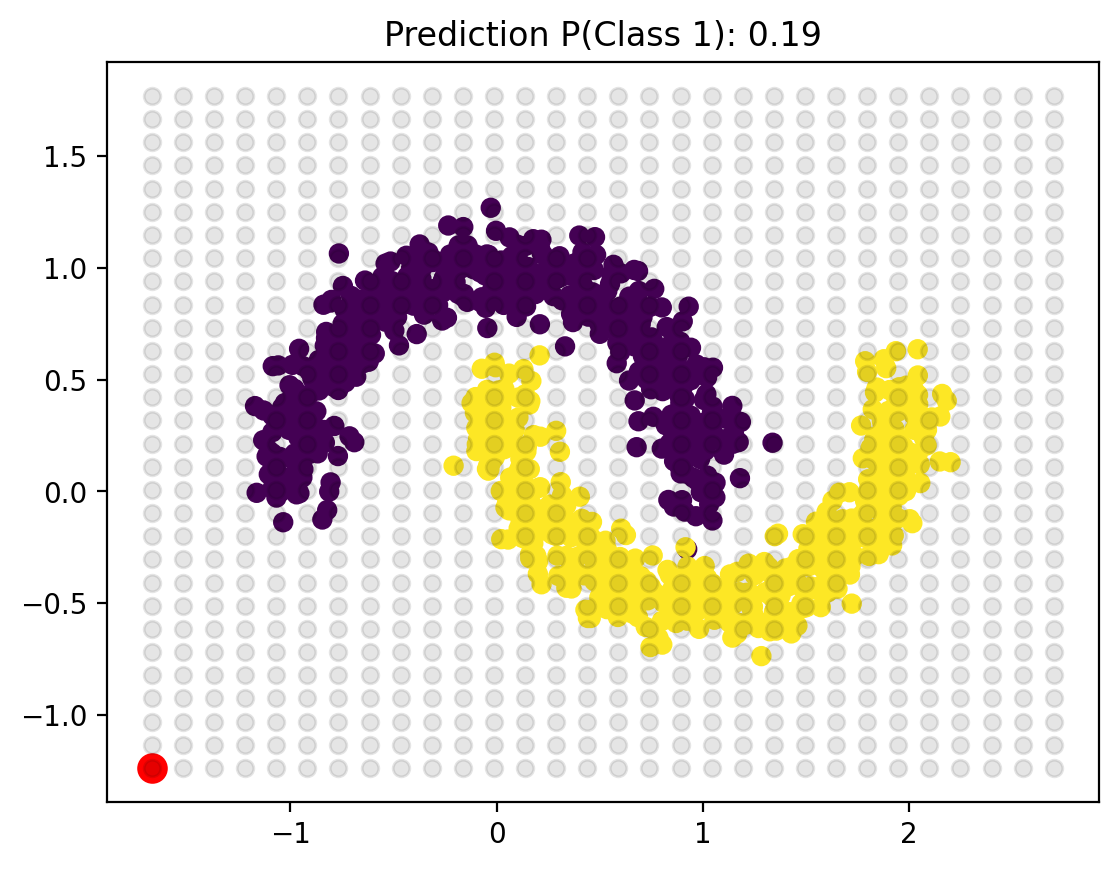

In [18]:
def update_plot(i=0, j=2):
    x_point = XX[i, j]
    y_point = YY[i, j]


    plt.plot(XX, YY, 'o', alpha=0.1, color='k')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.viridis)

    pred = rf.predict_proba([[x_point, y_point]])[:, 1]

    plt.scatter(x_point, y_point, s=100, c='r')
    plt.title(f"Prediction P(Class 1): {pred[0]:.2f}")
    plt.show()

update_plot(0, 0)

In [19]:
widget = interactive(update_plot, i=(0, XX.shape[0]-1), j=(0, XX.shape[1]-1))

# Display the widget
display(widget)

interactive(children=(IntSlider(value=0, description='i', max=29), IntSlider(value=2, description='j', max=29)…

In [94]:
XX[0], YY[:, 0]

(array([-1.67150293, -1.52070662, -1.36991031, -1.219114  , -1.06831769,
        -0.91752137, -0.76672506, -0.61592875, -0.46513244, -0.31433613,
        -0.16353982, -0.01274351,  0.1380528 ,  0.28884911,  0.43964542,
         0.59044173,  0.74123804,  0.89203435,  1.04283066,  1.19362697,
         1.34442328,  1.49521959,  1.6460159 ,  1.79681221,  1.94760852,
         2.09840483,  2.24920114,  2.39999745,  2.55079376,  2.70159007]),
 array([-1.23673767, -1.13313159, -1.02952551, -0.92591943, -0.82231335,
        -0.71870727, -0.61510119, -0.51149511, -0.40788903, -0.30428295,
        -0.20067687, -0.09707079,  0.00653529,  0.11014137,  0.21374745,
         0.31735353,  0.42095961,  0.52456569,  0.62817177,  0.73177785,
         0.83538393,  0.93899001,  1.04259609,  1.14620217,  1.24980825,
         1.35341433,  1.45702041,  1.56062649,  1.66423257,  1.76783865]))

In [102]:
XX.shape

(30, 30)

In [21]:
from einops import rearrange, repeat, reduce

In [20]:
XX.shape

(30, 30)

In [22]:
XX.ravel().shape

(900,)

In [23]:
rearrange(XX, 'i j -> (i j) 1').shape, rearrange(XX, 'i j -> (i j)').shape

((900, 1), (900,))

In [24]:
rearrange(YY, 'i j -> (i j) 1').shape

(900, 1)

In [25]:
XX_flat = rearrange(XX, 'i j -> (i j) 1')
YY_flat = rearrange(YY, 'i j -> (i j) 1')


In [26]:
np.array([XX_flat, YY_flat]).shape

(2, 900, 1)

In [29]:
rearrange([XX_flat, YY_flat], 'f n 1 -> n f').shape

(900, 2)

In [28]:
X_feature = rearrange([XX_flat, YY_flat], 'f n 1 -> n f')


In [30]:
X_feature[:32]

array([[-1.67150293, -1.23673767],
       [-1.52070662, -1.23673767],
       [-1.36991031, -1.23673767],
       [-1.219114  , -1.23673767],
       [-1.06831769, -1.23673767],
       [-0.91752137, -1.23673767],
       [-0.76672506, -1.23673767],
       [-0.61592875, -1.23673767],
       [-0.46513244, -1.23673767],
       [-0.31433613, -1.23673767],
       [-0.16353982, -1.23673767],
       [-0.01274351, -1.23673767],
       [ 0.1380528 , -1.23673767],
       [ 0.28884911, -1.23673767],
       [ 0.43964542, -1.23673767],
       [ 0.59044173, -1.23673767],
       [ 0.74123804, -1.23673767],
       [ 0.89203435, -1.23673767],
       [ 1.04283066, -1.23673767],
       [ 1.19362697, -1.23673767],
       [ 1.34442328, -1.23673767],
       [ 1.49521959, -1.23673767],
       [ 1.6460159 , -1.23673767],
       [ 1.79681221, -1.23673767],
       [ 1.94760852, -1.23673767],
       [ 2.09840483, -1.23673767],
       [ 2.24920114, -1.23673767],
       [ 2.39999745, -1.23673767],
       [ 2.55079376,

In [31]:
Z = rf.predict_proba(X_feature)[:, 1]

In [32]:
Z.shape

(900,)

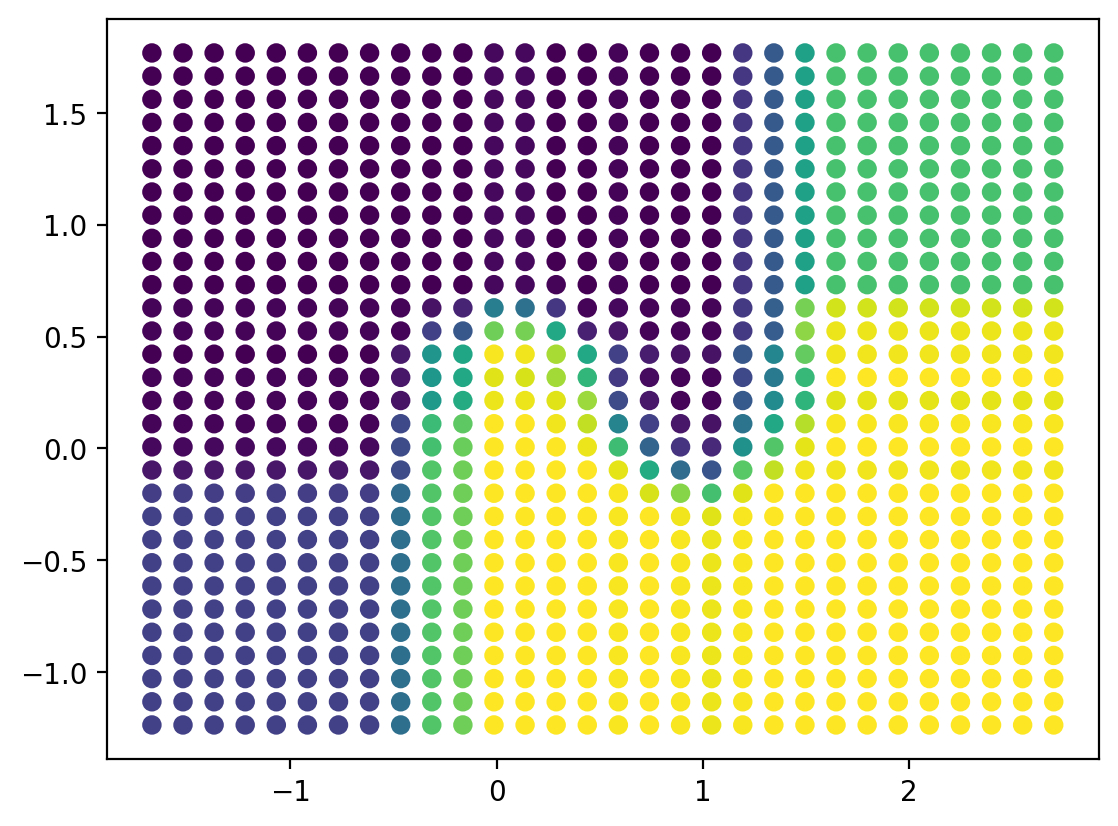

In [33]:
plt.scatter(XX_flat, YY_flat, c=Z, cmap=plt.cm.viridis)

In [183]:
Z[:10]

array([0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.36, 0.73])

In [184]:
# Divide Z into k levels
k = 10
min_Z = Z.min()
max_Z = Z.max()

levels = np.linspace(min_Z, max_Z, k)

levels

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

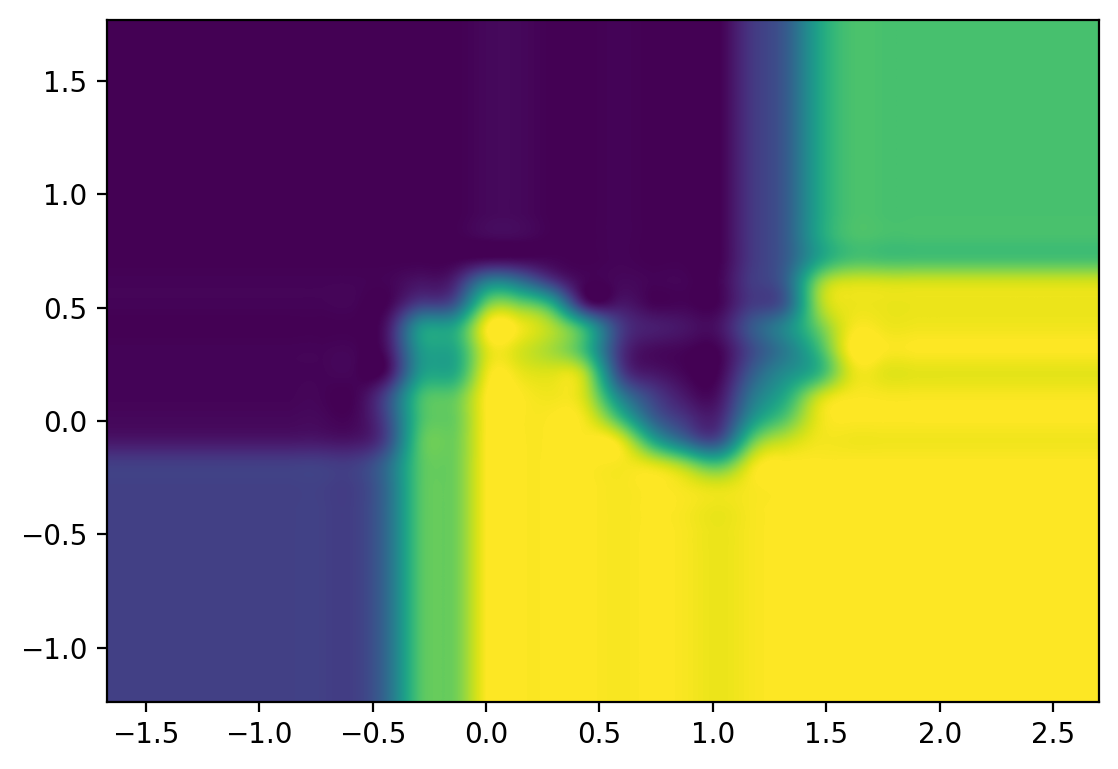

In [181]:
# Create an image from Z 
img = rearrange(Z, '(h w) -> h w', h=XX.shape[0])
plt.imshow(img, cmap=plt.cm.viridis, 
           extent=[XX.min(), XX.max(), YY.min(), YY.max()], 
           origin='lower',
           interpolation='spline36')

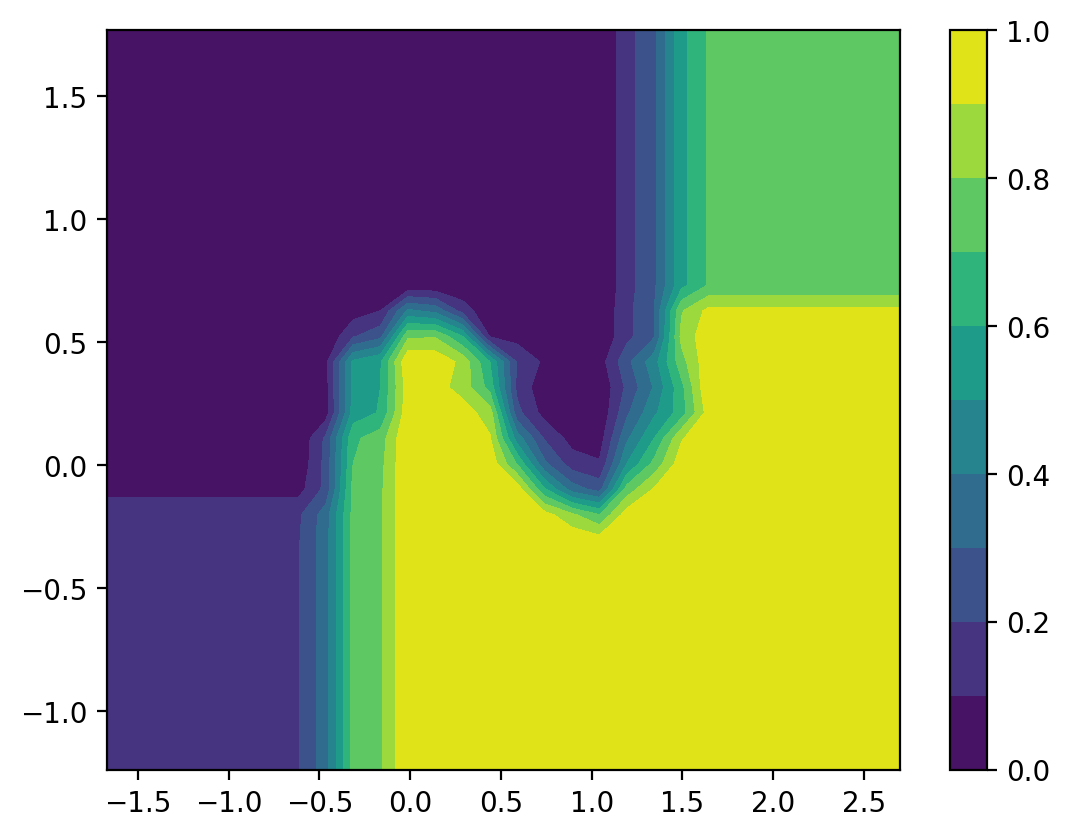

In [38]:
plt.contourf(XX, YY, Z.reshape(XX.shape), cmap=plt.cm.viridis, levels=10);
plt.colorbar();

In [124]:
plt.contourf?

Signature: plt.contourf(*args, data=None, **kwargs)
Docstring:
Plot filled contours.

Call signature::

    contourf([X, Y,] Z, [levels], **kwargs)

`.contour` and `.contourf` draw contour lines and filled contours,
respectively.  Except as noted, function signatures and return values
are the same for both versions.

Parameters
----------
X, Y : array-like, optional
    The coordinates of the values in *Z*.

    *X* and *Y* must both be 2D with the same shape as *Z* (e.g.
    created via `numpy.meshgrid`), or they must both be 1-D such
    that ``len(X) == N`` is the number of columns in *Z* and
    ``len(Y) == M`` is the number of rows in *Z*.

    *X* and *Y* must both be ordered monotonically.

    If not given, they are assumed to be integer indices, i.e.
    ``X = range(N)``, ``Y = range(M)``.

Z : (M, N) array-like
    The height values over which the contour is drawn.

levels : int or array-like, optional
    Determines the number and positions of the contour lines / regions.

 

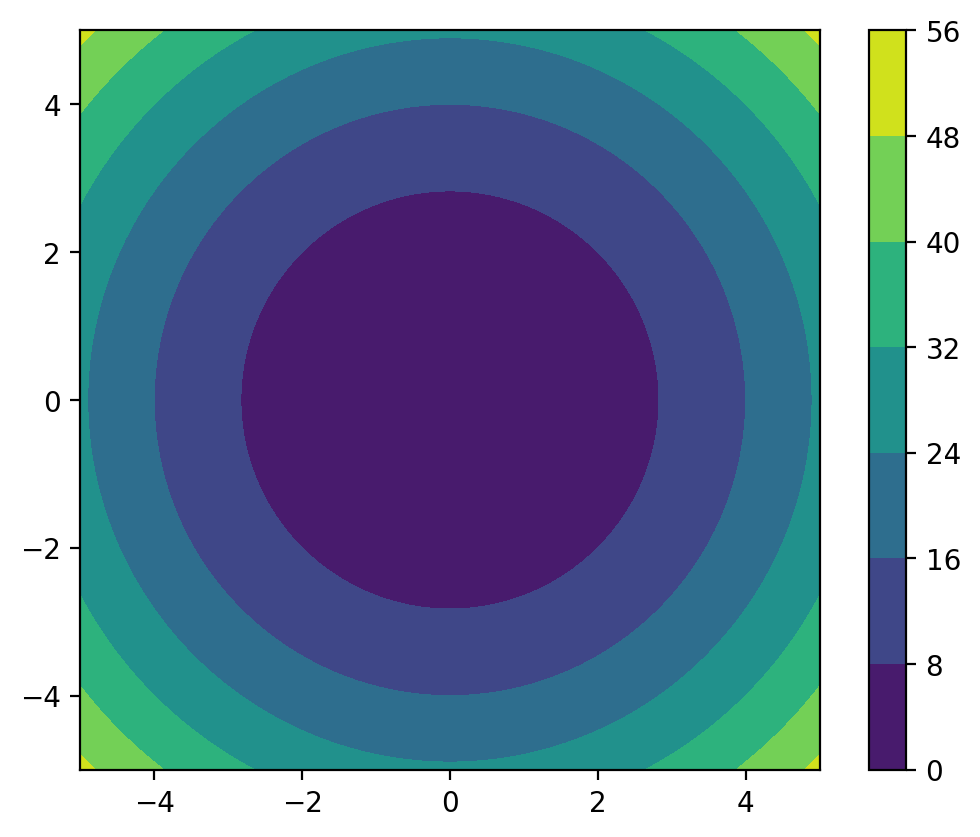

In [190]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x, y)

Z = X**2 + Y**2

plt.contourf(X, Y, Z, cmap=plt.cm.viridis);
plt.gca().set_aspect('equal')
plt.colorbar();

/tmp/ipykernel_2896512/3580262868.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


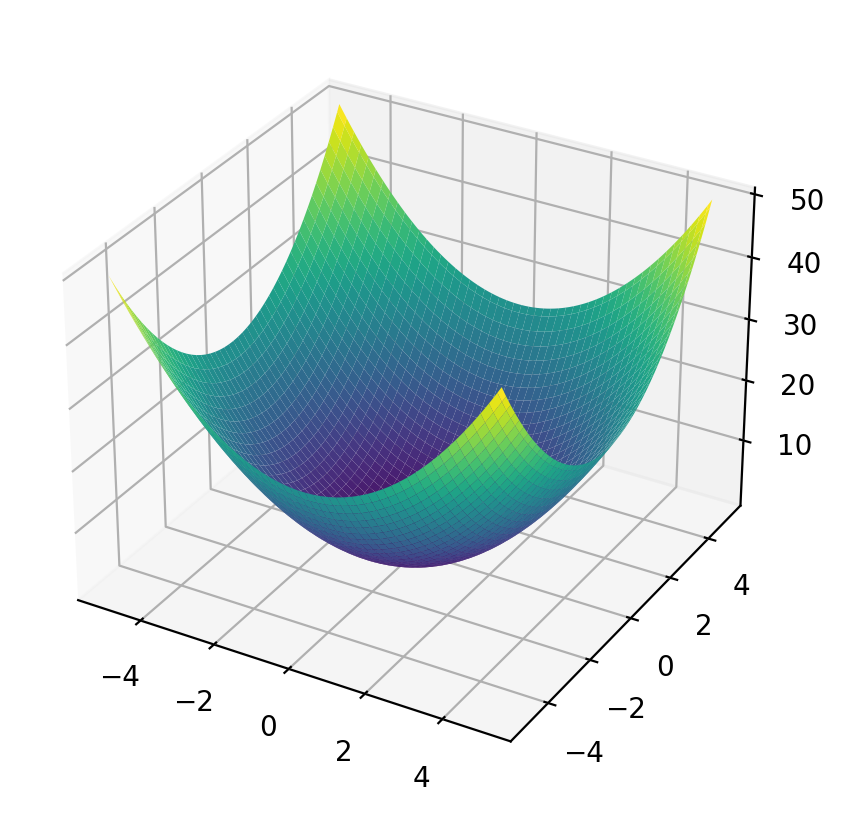

In [193]:
# Surface plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5, 5))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis)